# Sandbox for testing purposes

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from scipy.linalg import block_diag

from cereeberus import EmbeddedGraph, ReebGraph
import cereeberus.data.ex_mappergraphs as ex_mg
import cereeberus.data.ex_reebgraphs as ex_rg
import cereeberus.data.ex_graphs as ex_g
# from cereeberus.data.ex_mergetrees import randomMergeTree

import cereeberus.distance.ilp as ilp


from cereeberus.distance.interleave import Interleave, Assignment


from cereeberus.distance.labeled_blocks import LabeledBlockMatrix as LBM 
from cereeberus.distance.labeled_blocks import LabeledMatrix as LM
from cereeberus.compute.unionfind import UnionFind

In [ ]:
h = 16 # height of the torus 
n = 3 
# Correct interleaving distance should be ceiling of h/4
true_interleaving = np.ceil(h/4)
T = ex_mg.torus(0, 2, 2+h, 4+h, delta = 1, seed = 17)
L = ex_mg.line(0, 4+h)
myAssgn_TL = Assignment(L,T, n = n)
myAssgn_TL.optimize(printOptimizerOutput=False)


1.0

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/anaconda3/lib/python3.12/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/lm/dn75vz_d72b1cntn3ncjj10c0000gn/T/489a35bef2f546e18cf02934efccd40b-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/lm/dn75vz_d72b1cntn3ncjj10c0000gn/T/489a35bef2f546e18cf02934efccd40b-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 1648 COLUMNS
At line 5522 RHS
At line 7166 BOUNDS
At line 7763 ENDATA
Problem MODEL has 1643 rows, 596 columns and 2680 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 0 - 0.00 seconds
Cgl0003I 0 fixed, 9 tightened bounds, 2 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 11 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 11 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds,

In [4]:

Loss = myAssgn_TL.loss(verbose = True)
print('Loss = ', Loss)
print('n = ', n)
print("\nComputed distance Loss = ", Loss + n)
print("True interleaving distance = ", true_interleaving)

In [5]:
myInt = Interleave(L, T)
# myInt.phi()

In [7]:
search_data = myInt.fit(verbose=True)

In [8]:
search_data

{1: 3.0, 2: 2.0, 4: -0.0, 3: 1.0}

In [9]:
myInt.n

4

In [49]:
# map_dict, loss_val = ilp.solve_ilp(myAssgn_TL);
out = ilp.solve_ilp(myAssgn_TL, verbose = True)

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/anaconda3/lib/python3.12/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/lm/dn75vz_d72b1cntn3ncjj10c0000gn/T/dbf45bac007d4e5a9602c884a58cd109-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/lm/dn75vz_d72b1cntn3ncjj10c0000gn/T/dbf45bac007d4e5a9602c884a58cd109-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 1648 COLUMNS
At line 5522 RHS
At line 7166 BOUNDS
At line 7763 ENDATA
Problem MODEL has 1643 rows, 596 columns and 2680 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 0 - 0.00 seconds
Cgl0003I 0 fixed, 9 tightened bounds, 2 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 11 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 11 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds,

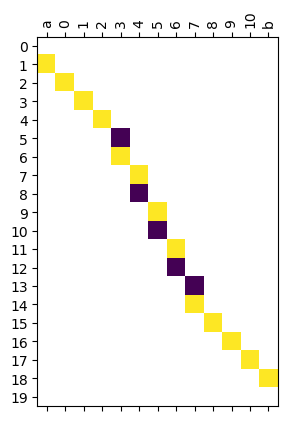

In [21]:
out[0]['phi_0_V'].draw(filltype = 'nan')

In [10]:
M = myAssgn_TL.get_interleaving_map('phi', 'n', 'V')

M.get_all_block_indices()

[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

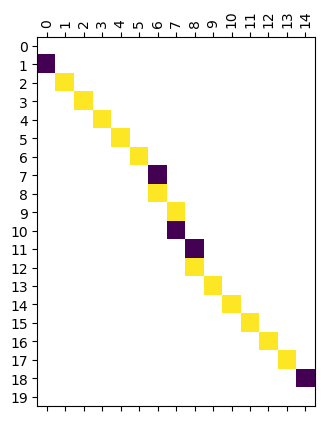

In [11]:
M.draw(filltype='nan')

In [13]:
M[-2]

LabeledMatrix(
array=
[], 
rows=[0], 
cols=[])

In [16]:
M[-1].shape()

(1, 1)

In [6]:
map_dict

{'Phi_0_V': LabeledBlockMatrix(matrices={0: LabeledMatrix(
 array=
 [[1.]], 
 rows=[1], 
 cols=['a']), 1: LabeledMatrix(
 array=
 [[1.]], 
 rows=[2], 
 cols=[0]), 2: LabeledMatrix(
 array=
 [[1.]], 
 rows=[3], 
 cols=[1]), 3: LabeledMatrix(
 array=
 [[1.]], 
 rows=[4], 
 cols=[2]), 4: LabeledMatrix(
 array=
 [[0.]
  [1.]], 
 rows=[5, 6], 
 cols=[3]), 5: LabeledMatrix(
 array=
 [[0.]
  [1.]], 
 rows=[7, 8], 
 cols=[4]), 6: LabeledMatrix(
 array=
 [[0.]
  [1.]], 
 rows=[9, 10], 
 cols=[5]), 7: LabeledMatrix(
 array=
 [[0.]
  [1.]], 
 rows=[11, 12], 
 cols=[6]), 8: LabeledMatrix(
 array=
 [[0.]
  [1.]], 
 rows=[13, 14], 
 cols=[7]), 9: LabeledMatrix(
 array=
 [[1.]], 
 rows=[15], 
 cols=[8]), 10: LabeledMatrix(
 array=
 [[1.]], 
 rows=[16], 
 cols=[9]), 11: LabeledMatrix(
 array=
 [[1.]], 
 rows=[17], 
 cols=[10]), 12: LabeledMatrix(
 array=
 [[1.]], 
 rows=[18], 
 cols=['b'])}),
 'Phi_0_E': LabeledBlockMatrix(matrices={0: LabeledMatrix(
 array=
 [[1.]], 
 rows=[(1, 2, 0)], 
 cols=[('a', 

In [7]:
map_dict.keys()

dict_keys(['Phi_0_V', 'Phi_0_E', 'Phi_n_V', 'Phi_n_E', 'Psi_0_V', 'Psi_0_E', 'Psi_n_V', 'Psi_n_E'])

<Axes: >

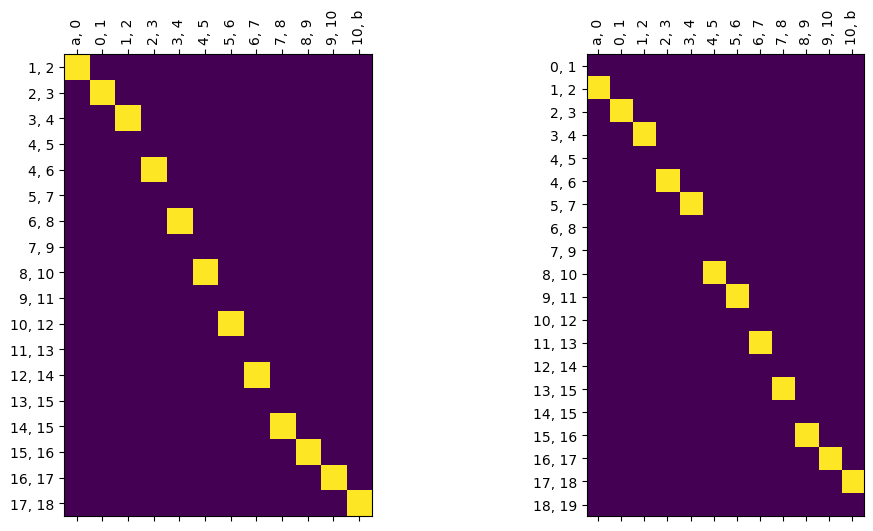

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
map_dict['Phi_0_E'].draw(ax[0],)
myAssgn_TL.phi('0', 'E').draw(ax[1],)


In [22]:
F = ex_mg.line(0,10)
G = ex_mg.torus(0,1,9,10)


myInt = Assignment(F, G, n = 0, initialize_random_maps=True, seed = 17)

myInt.loss()



4.0

In [24]:
myInt.optimize()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/anaconda3/lib/python3.12/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/lm/dn75vz_d72b1cntn3ncjj10c0000gn/T/8cd2befe8aff4df88df018a8d9ac4de6-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/lm/dn75vz_d72b1cntn3ncjj10c0000gn/T/8cd2befe8aff4df88df018a8d9ac4de6-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 992 COLUMNS
At line 3566 RHS
At line 4554 BOUNDS
At line 4931 ENDATA
Problem MODEL has 987 rows, 376 columns and 1820 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 0 - 0.00 seconds
Cgl0003I 0 fixed, 17 tightened bounds, 4 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 17 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 17 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 

2.0

In [5]:
myInt.loss()

2.0

(<Figure size 1000x1000 with 4 Axes>,
 array([[<Axes: title={'center': '$\\varphi_0^V$'}, xlabel='V(F)', ylabel='V(G_n)'>,
         <Axes: title={'center': '$\\varphi_n^V$'}, xlabel='V(F_n)', ylabel='V(G_2n)'>],
        [<Axes: title={'center': '$\\varphi_0^E$'}, xlabel='E(F)', ylabel='E(G_n)'>,
         <Axes: title={'center': '$\\varphi_n^E$'}, xlabel='E(F_n)', ylabel='E(G_2n)'>]],
       dtype=object))

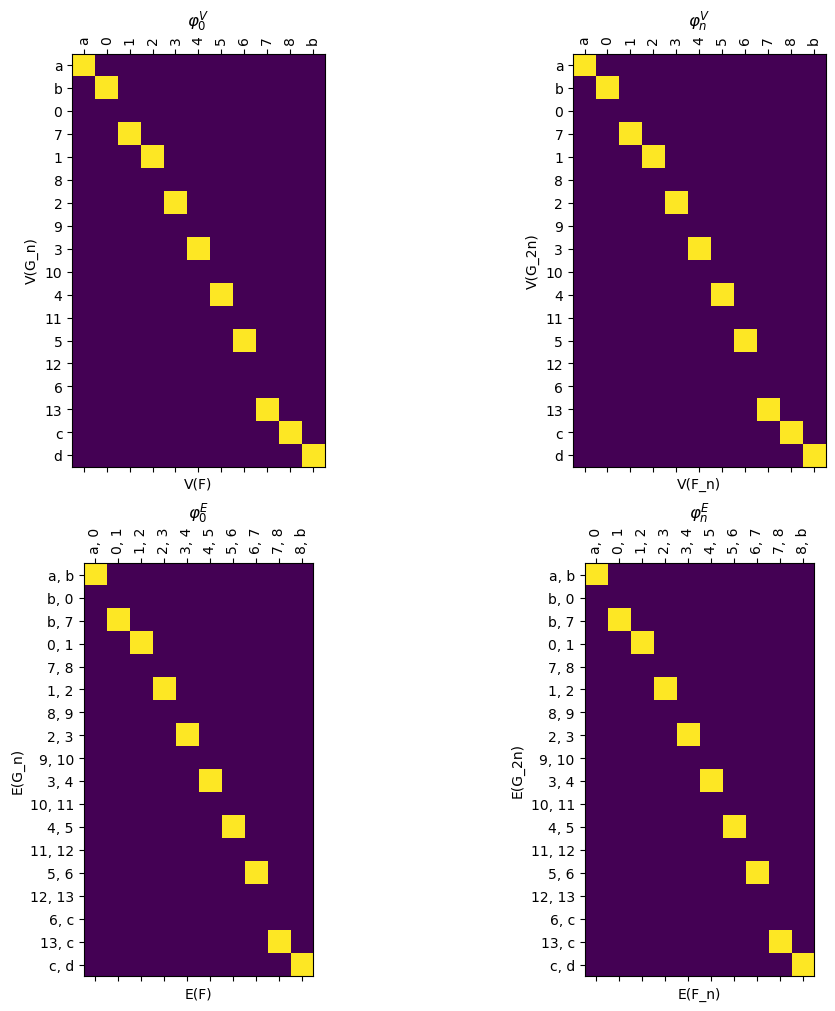

In [6]:
myInt.draw_all_phi()

In [25]:
F = ex_mg.interleave_example_A()
G = ex_mg.interleave_example_B()


myInt = Assignment(F, G, n = 1, initialize_random_maps=True, seed = 17)

myInt.loss()



6.0

In [26]:
map_dict, loss_val = ilp.solve_ilp(myInt);

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/anaconda3/lib/python3.12/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/lm/dn75vz_d72b1cntn3ncjj10c0000gn/T/8423cd8c162b414e8aa48938bd65a2b1-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/lm/dn75vz_d72b1cntn3ncjj10c0000gn/T/8423cd8c162b414e8aa48938bd65a2b1-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 2812 COLUMNS
At line 11778 RHS
At line 14586 BOUNDS
At line 15713 ENDATA
Problem MODEL has 2807 rows, 1126 columns and 6712 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 0.46875 - 0.01 seconds
Cgl0003I 0 fixed, 33 tightened bounds, 514 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 221 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 72 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tig

In [27]:
myInt.phi_['0'].keys()

dict_keys(['V', 'E'])

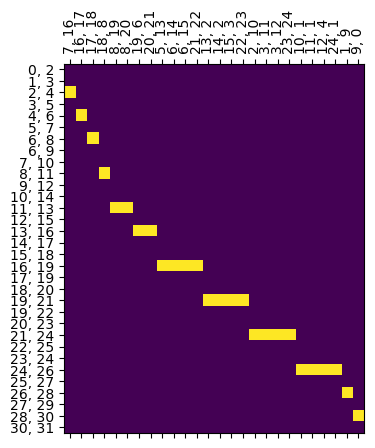

In [29]:
map_dict['phi_0_E'].draw()

In [31]:
F = ex_mg.interleave_example_A()
G = ex_mg.interleave_example_B()


myInt = Interleave(F, G, n = 1, initialize_random_maps=True, seed = 17)

myInt.loss()


TypeError: Interleave.__init__() got an unexpected keyword argument 'n'

In [17]:
ilp.solve_ilp(myInt, verbose = True)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/j9/kbv0jxbn7458fwg4nvr4rlkm0000gn/T/ipykernel_49302/3716933441.py", line 1, in <module>
    ilp.solve_ilp(myInt, verbose = True)
  File "/Users/lizliz/Library/CloudStorage/Dropbox/Math/Code/ceREEBerus/cereeberus/cereeberus/distance/ilp.py", line 248, in solve_ilp
    first_term = pulp.lpSum([map_V_vars[i,j] * bou_0[j][k] for j in range(shape_n_mix)])
                            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/lizliz/Library/CloudStorage/Dropbox/Math/Code/ceREEBerus/cereeberus/cereeberus/distance/ilp.py", line 248, in <listcomp>
    first_term = pulp.lpSum([map_V_vars[i,j] * bou_0[j][k] for j in range(shape_n_mix)])
                             ~~~~~~~~~~^^^^^
KeyError: (0, 0)

During handling of the above exception, another exc

In [5]:
F = ex_mg.line(0,10)
G = ex_mg.torus(0,1,3,10)


myInt = Interleave(F, G, n = 0, initialize_random_maps=True, seed = 17)

myInt.loss()



1.0

In [ ]:
E